Cargando la BD [MNIST](https://http://yann.lecun.com/exdb/mnist/) en Keras

In [48]:
import numpy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Información sobre los datos de entrenamiento

In [49]:
train_images.shape

(60000, 28, 28)

In [50]:
len(train_labels)

60000

In [51]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Información sobre los datos de prueba

In [52]:
test_images.shape

(10000, 28, 28)

In [53]:
len(test_labels)

10000

In [54]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Arquitectura de la red

In [55]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])

Definición de optimizador, función de pérdida y métrica

In [56]:
model.compile(optimizer='rmsprop',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

Preparando los datos

In [57]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Entrenando la red

In [58]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
model.summary()

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2595 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1036 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0686 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0498 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0384 - accuracy: 0.9886
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
__________

Hacer algunas predicciones (probabilidad de que sea un digito 0-9)

In [59]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([1.5168631e-08, 2.8073706e-09, 1.9549661e-05, 1.3373728e-04,
       1.4566681e-11, 5.2744156e-08, 2.7045078e-12, 9.9984515e-01,
       9.6754306e-08, 1.4829126e-06], dtype=float32)

Verificación del dígito

In [60]:
test_labels[0]

7

Evaluando la red

In [61]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)
print('test_loss: ',test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0662 - accuracy: 0.9780
test_acc:  0.9779999852180481
test_loss:  0.06615595519542694


Calculo de la matriz de confusion

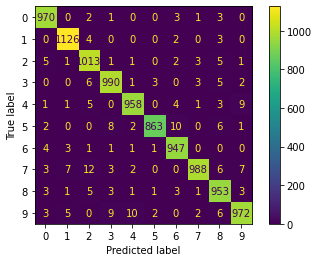

In [62]:
test_predictions = model.predict(test_images)
cm = confusion_matrix(test_labels, test_predictions.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Cargar de nuevo la BD y visualizar el dígito de la predicción

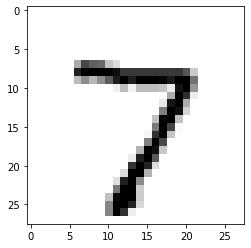

In [63]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = test_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Ejercicios:
----------
1. Retire el batch_size ¿Qué observa?
2. ¿Mejora la precisión (**accuracy**) si aumenta las pasadas (**epoch**)? ¿Por qué?
